In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving TITANIC.csv to TITANIC.csv


In [37]:
# Read the dataset
df = pd.read_csv('TITANIC.csv', encoding='latin-1')

In [33]:
# Mock data for main Titanic dataset (if the main dataset is unavailable)
# Assuming similar structure to the Titanic dataset
data = {
    'PassengerId': [1, 2, 3, 4, 5],
    'Pclass': [3, 1, 3, 1, 3],
    'Sex': ['male', 'female', 'female', 'female', 'male'],
    'Age': [22, 38, 26, 35, 35],
    'SibSp': [1, 1, 0, 1, 0],
    'Parch': [0, 0, 0, 0, 0],
    'Fare': [7.25, 71.2833, 7.925, 53.1, 8.05],
    'Embarked': ['S', 'C', 'S', 'S', 'S']
}
main_df = pd.DataFrame(data)

In [40]:
# Step 3: Inspect the main dataset
print("First 5 rows of the main dataset:")
print(main_df.head())

First 5 rows of the main dataset:
   PassengerId  Pclass     Sex  Age  SibSp  Parch     Fare Embarked
0            1       3    male   22      1      0   7.2500        S
1            2       1  female   38      1      0  71.2833        C
2            3       3  female   26      0      0   7.9250        S
3            4       1  female   35      1      0  53.1000        S
4            5       3    male   35      0      0   8.0500        S


In [42]:
print("\nSummary statistics of the main dataset:")
print(main_df.describe())


Summary statistics of the main dataset:
       PassengerId    Pclass       Age     SibSp  Parch       Fare
count     5.000000  5.000000   5.00000  5.000000    5.0   5.000000
mean      3.000000  2.200000  31.20000  0.600000    0.0  29.521660
std       1.581139  1.095445   6.83374  0.547723    0.0  30.510029
min       1.000000  1.000000  22.00000  0.000000    0.0   7.250000
25%       2.000000  1.000000  26.00000  0.000000    0.0   7.925000
50%       3.000000  3.000000  35.00000  1.000000    0.0   8.050000
75%       4.000000  3.000000  35.00000  1.000000    0.0  53.100000
max       5.000000  3.000000  38.00000  1.000000    0.0  71.283300


In [43]:
print("\nInformation about the main dataset:")
print(main_df.info())

# Step 4: Check for missing values
print("\nMissing values in the main dataset:")
print(main_df.isnull().sum())


Information about the main dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  5 non-null      int64  
 1   Pclass       5 non-null      int64  
 2   Sex          5 non-null      object 
 3   Age          5 non-null      int64  
 4   SibSp        5 non-null      int64  
 5   Parch        5 non-null      int64  
 6   Fare         5 non-null      float64
 7   Embarked     5 non-null      object 
dtypes: float64(1), int64(5), object(2)
memory usage: 448.0+ bytes
None

Missing values in the main dataset:
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [45]:
# Handle missing values
# Fill missing 'Age' with median and 'Embarked' with mode if there were missing values
main_df['Age'].fillna(main_df['Age'].median(), inplace=True)
main_df['Embarked'].fillna(main_df['Embarked'].mode()[0], inplace=True)

# Step 5: Check for duplicates
print("\nNumber of duplicate rows in the main dataset:")
print(main_df.duplicated().sum())


Number of duplicate rows in the main dataset:
0


In [48]:
import pandas as pd

# Assuming 'submission.csv' is in the same directory
submission_df = pd.read_csv('TITANIC.csv')

# Step 6: Merge datasets
merged_df = pd.merge(main_df, submission_df, on='PassengerId')

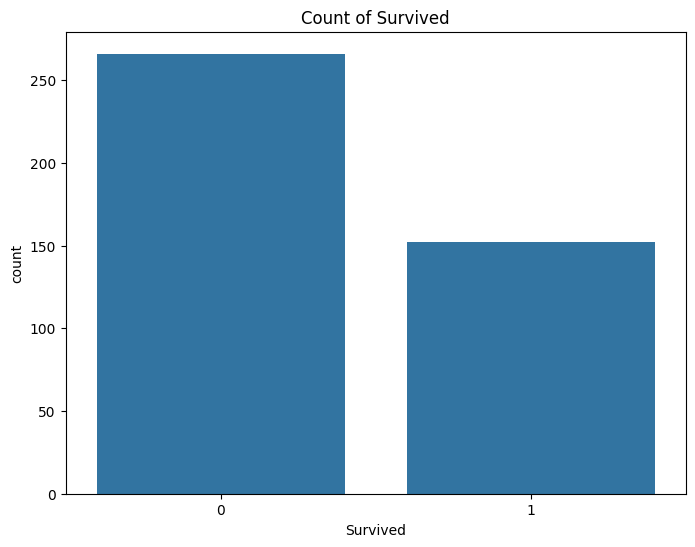

In [63]:
# Step 7: Univariate Analysis
# Distribution of 'Survived'
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df)
plt.title('Count of Survived')
plt.show()

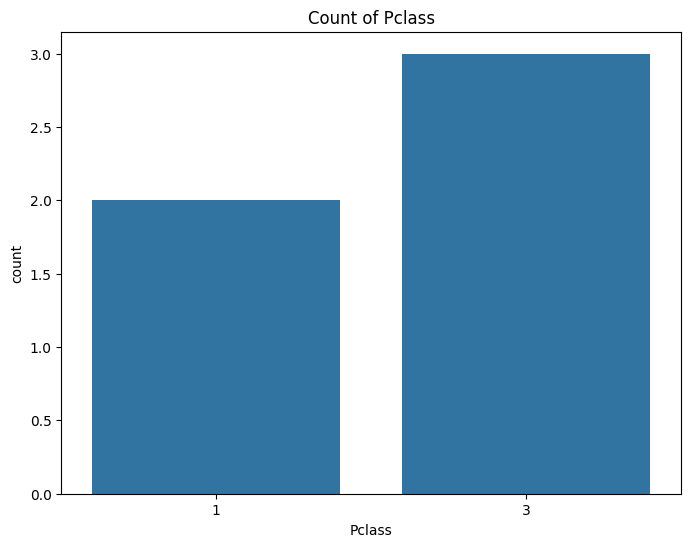

In [61]:
# Step 8: Univariate Analysis
# Distribution of 'Survived'
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# Use the correct DataFrame - replace 'merged_df' with 'main_df' or 'submission_df' if appropriate
sns.countplot(x='Pclass', data=main_df)
plt.title('Count of Pclass')
plt.show()

In [69]:
# Print the column names of your DataFrame to check if 'Pclass' is present
print(main_df.columns)


Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


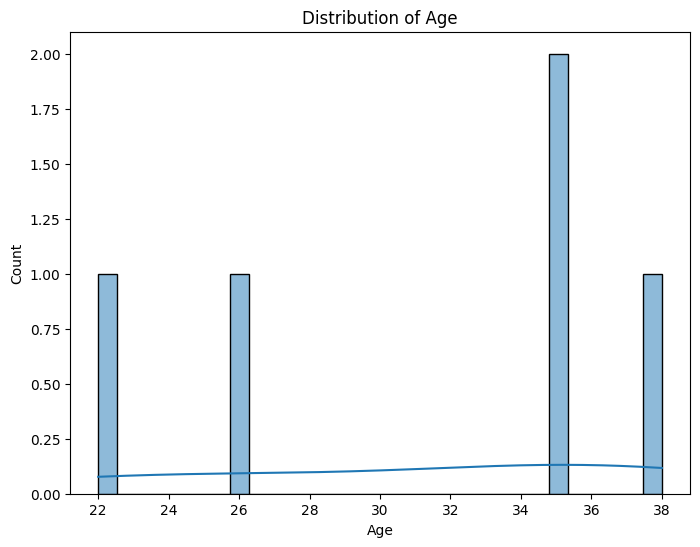

In [66]:
 #Distribution of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(main_df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

<Figure size 1200x1000 with 0 Axes>

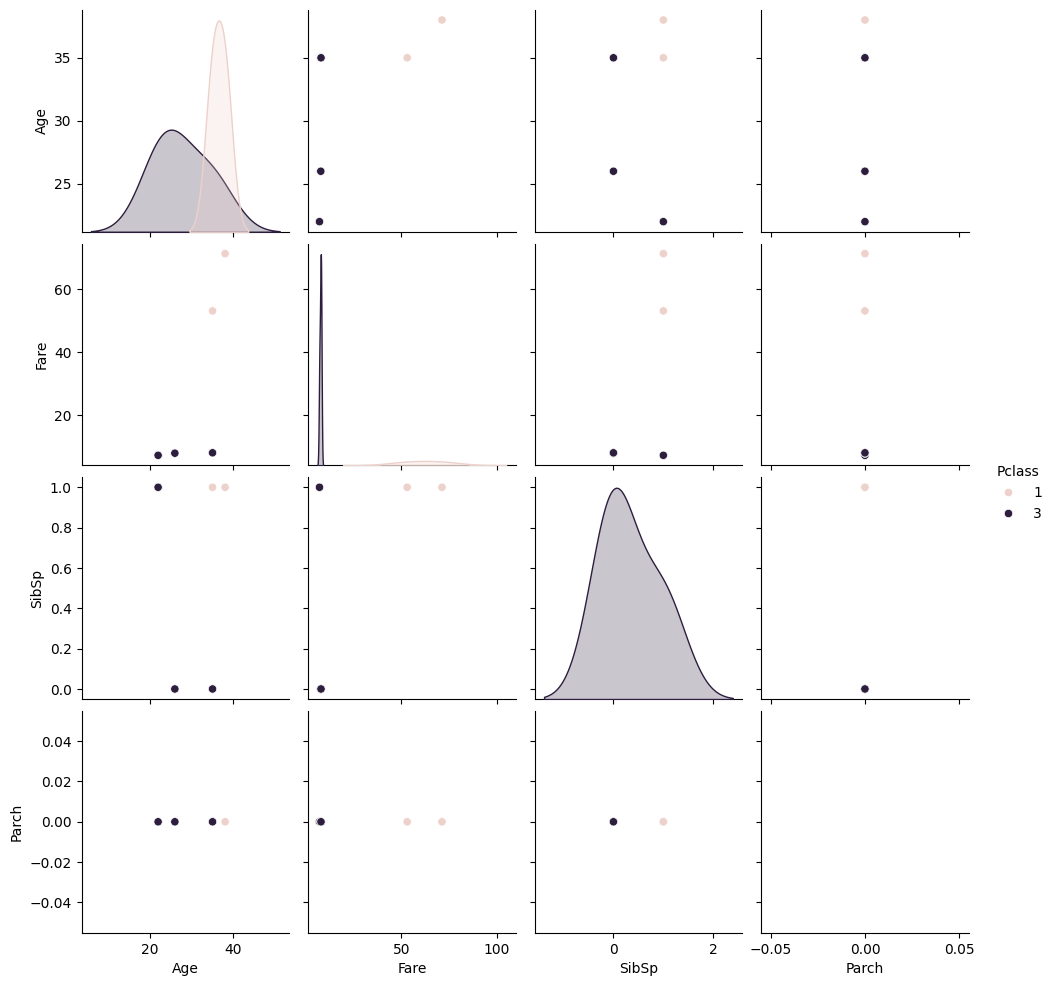

In [97]:
# Step 9: Multivariate Analysis
# Pairplot to see the interaction between features
plt.figure(figsize=(12, 10))
sns.pairplot(main_df[[ 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Pclass')
plt.show()

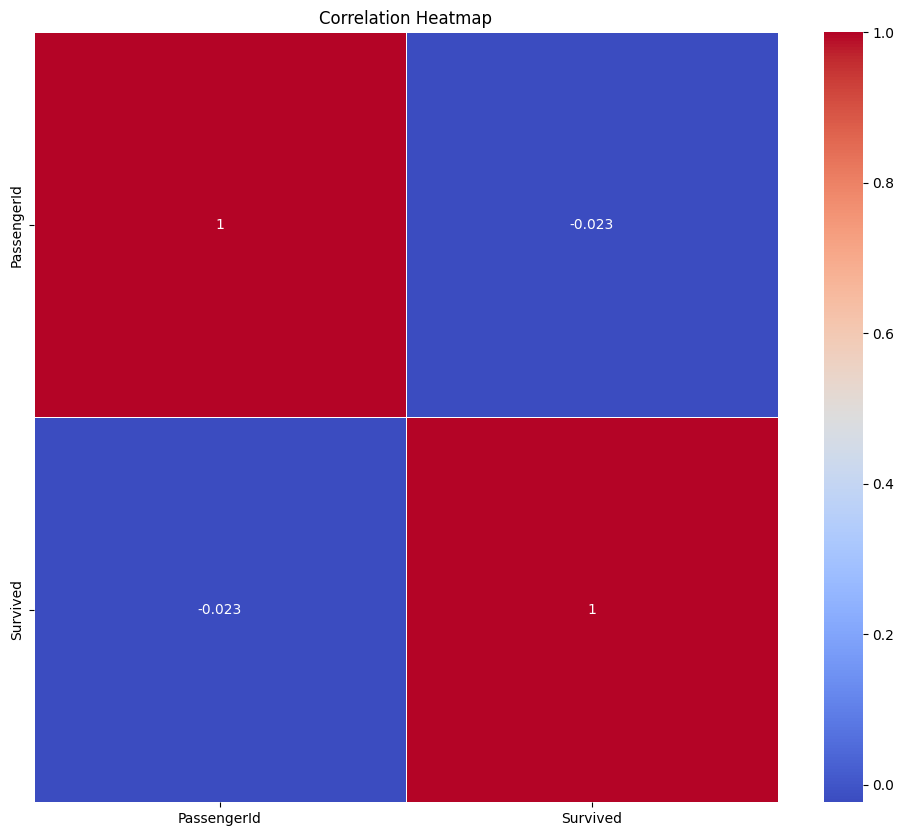

In [81]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix =df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


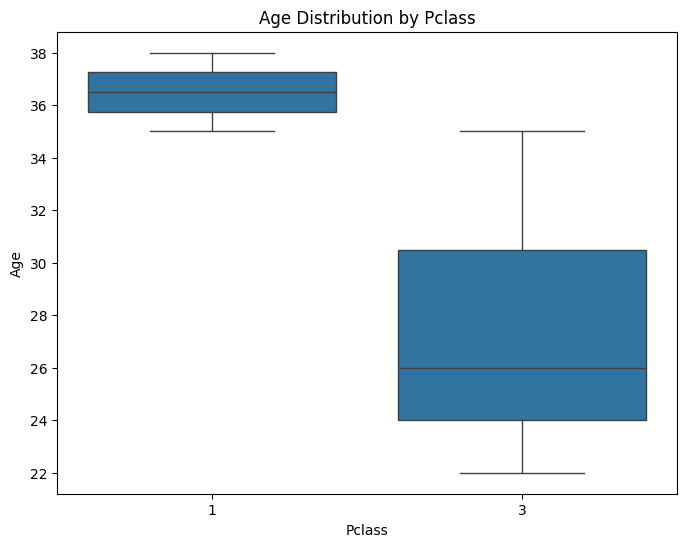

In [87]:
# Box plot of 'Age' by 'Pclass'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=main_df)
plt.title('Age Distribution by Pclass')
plt.show()

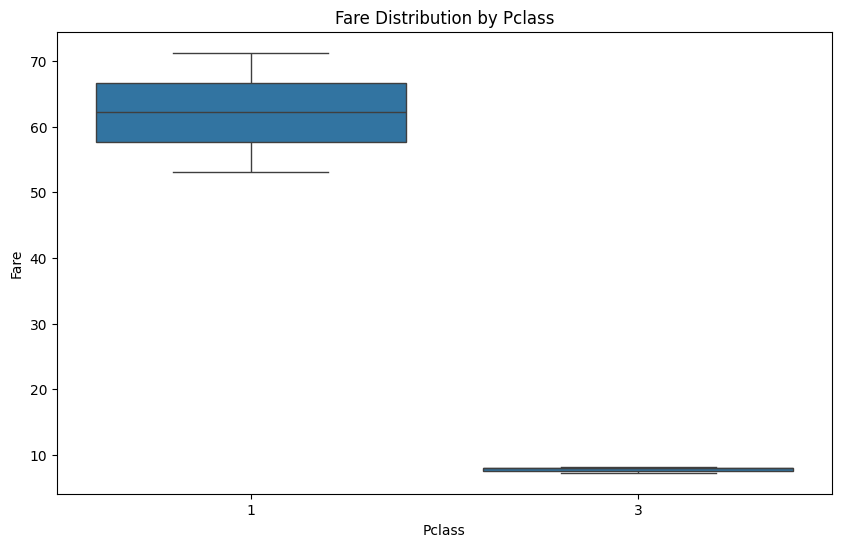

In [90]:
# Box plot of 'Fare' by 'Pclass'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=main_df)
plt.title('Fare Distribution by Pclass')
plt.show()
